In [632]:
import pandas as pd
import numpy as np

In [633]:
df = pd.read_csv('LBW_Dataset.csv')

In [634]:
df.shape

(96, 10)

In [635]:
stat_details = df.describe()

In [636]:
stat_details

,Community,Age,Weight,Delivery phase,HB,IFA,BP,Education,Residence,Result
count,96.000000,89.000000,85.000000,92.000000,77.000000,96.000000,81.000000,93.0,94.000000,96.000000
mean,2.177083,23.752809,45.129412,1.021739,9.076623,0.687500,1.725189,5.0,1.138298,0.750000
std,1.213909,3.321011,8.215532,0.146630,0.788052,0.465946,1.449447,0.0,0.347063,0.435286
min,1.000000,17.000000,30.000000,1.000000,5.900000,0.000000,1.200000,5.0,1.000000,0.000000
25%,1.000000,21.000000,40.000000,1.000000,8.900000,0.000000,1.375000,5.0,1.000000,0.750000
50%,2.500000,24.000000,43.000000,1.000000,9.000000,1.000000,1.500000,5.0,1.000000,1.000000
75%,3.000000,26.000000,50.000000,1.000000,9.200000,1.000000,1.661538,5.0,1.000000,1.000000
max,4.000000,38.000000,65.000000,2.000000,11.000000,1.000000,13.875000,5.0,2.000000,1.000000


In [637]:
### Delivery phase and Education features can be imputed with the mode value
df['Delivery phase'].value_counts()

1.0    90
2.0     2
Name: Delivery phase, dtype: int64

In [638]:
df['Delivery phase'].fillna(1.0, inplace = True)

In [639]:
df['Education'].value_counts()

5.0    93
Name: Education, dtype: int64

In [640]:
df['Education'].fillna(5.0, inplace = True)

In [641]:
df['Age'].fillna(df['Age'].mean(), inplace = True)
df['Weight'].fillna(df['Weight'].mean(), inplace = True)

In [642]:
import matplotlib.pyplot as plt

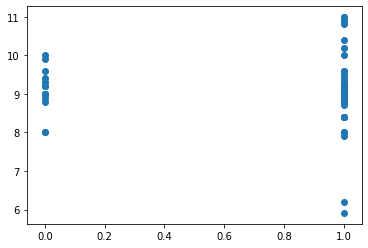

In [643]:
plt.scatter(df['Result'],df['HB'])

**Shows that the result class with 1 as label has wide range of HB values**

In [644]:
grouped_df = df.groupby(df['Result'])

In [645]:
grouped_df['HB'].median()

Result
0    9.1
1    9.0
Name: HB, dtype: float64

**Mean and median values show no much difference, could consider this wide range in graph while imputing**

In [646]:
df['HB'].fillna(df['HB'].mean(), inplace = True)

In [647]:
BP_mean = grouped_df['BP'].mean()

In [648]:
BP_mean

Result
0    1.775443
1    1.711841
Name: BP, dtype: float64

In [649]:
filt_1 = ((df['Result'] == 0) & (df['BP'].isnull()))
filt_2 = ((df['Result'] == 1) & (df['BP'].isnull()))
df.loc[filt_1, 'BP'] = BP_mean[0]
df.loc[filt_2, 'BP'] = BP_mean[1]

In [650]:
df['Residence'].value_counts()

1.0    81
2.0    13
Name: Residence, dtype: int64

In [651]:
df['Residence'].fillna(1, inplace = True)

In [652]:
df.describe()

,Community,Age,Weight,Delivery phase,HB,IFA,BP,Education,Residence,Result
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.0,96.000000,96.000000
mean,2.177083,23.752809,45.129412,1.020833,9.076623,0.687500,1.727741,5.0,1.135417,0.750000
std,1.213909,3.196317,7.725267,0.143576,0.704855,0.465946,1.330177,0.0,0.343964,0.435286
min,1.000000,17.000000,30.000000,1.000000,5.900000,0.000000,1.200000,5.0,1.000000,0.000000
25%,1.000000,21.000000,40.000000,1.000000,9.000000,0.000000,1.375000,5.0,1.000000,0.750000
50%,2.500000,24.000000,45.000000,1.000000,9.076623,1.000000,1.571429,5.0,1.000000,1.000000
75%,3.000000,25.250000,49.250000,1.000000,9.200000,1.000000,1.711841,5.0,1.000000,1.000000
max,4.000000,38.000000,65.000000,2.000000,11.000000,1.000000,13.875000,5.0,2.000000,1.000000


In [653]:
df.to_csv('cleaned_LBW_Dataset.csv')

In [654]:
X_train_sample = df.sample(int(0.75*len(df)))
X_test_sample = df.sample(int(0.25*len(df)))
columns = ['Community','Age','Weight','Delivery phase','HB','IFA','BP','Education','Residence']
X_train = X_train_sample[columns]
Y_train = X_train_sample['Result']
X_test = X_test_sample[columns]
Y_test_for_accuracy = X_test_sample['Result']
X_test = np.array(X_test)
Z = np.zeros((len(Y_train),1))
t = 0
for i in Y_train:
    Z[t] = i
    t+=1
X_train = np.array(X_train)
Y_test_for_accuracy

54    1
36    1
83    1
17    0
3     0
13    0
81    1
21    0
74    1
95    1
51    1
64    1
35    1
61    1
87    1
49    1
56    1
93    1
69    1
31    1
59    1
20    0
11    0
85    1
Name: Result, dtype: int64

In [655]:
wi_1 = np.random.randn(18,9)
bi_1 = [1 for i in range(18)]
wi_2 = np.random.randn(18,1)
bi_2 = [1 for i in range(1)]

In [656]:
def forward_prop(X,wi_1,bi_1,wi_2,bi_2):
    #first layer 
    M1 = 1/(1+np.exp(-(X.dot(wi_1.T)+bi_1)))
    #second layer
    A1 = M1.dot(wi_2)+bi_2 
    Y = 1/(1+np.exp(-(A1)))
    return Y,M1

In [657]:
a,b = forward_prop(X_train,wi_1,bi_1,wi_2,bi_2)

In [658]:
def diff_wi_2(H,Z,Y):
    #print(Z-Y)
    return H.T.dot(Z-Y)

def diff_wi_1(X,H,Z,output,wi_2):
    dz = (Z-output).dot(wi_2.T)*H*(1-H)
    return X.T.dot(dz)

In [659]:
def diff_B2(Z,Y):
    return (Z-Y).sum(axis=0)

def diff_B1(Z,Y,wi_2,H):
    return ((Z-Y).dot(wi_2.T)*H*(1-H)).sum(axis=0)

In [660]:
learning_rate = 1e-3
for epoch in range(25000):
    output,hidden = forward_prop(X_train,wi_1,bi_1,wi_2,bi_2)
    wi_2+=learning_rate*diff_wi_2(hidden,Z,output)
    bi_2+=learning_rate*diff_B2(Z,output)
    wi_1+=learning_rate*diff_wi_1(X_train,hidden,Z,output,wi_2).T
    bi_1+=learning_rate*diff_B1(Z,output,wi_2,hidden)
    

In [661]:
hidden_output = 1/(1+np.exp(-((X_test.dot(wi_1.T))-bi_1)))
output_layer_output = hidden_output.dot(wi_2)+bi_2 
Y = 1/(1+np.exp(-(output_layer_output)))
#Y,Y_test_for_accuracy
#print("Probability of class 0>>>{}\n Probability of class 1>>>{} ".format(Y[0],Y[1]))

In [662]:
output = 0
output_array = list(zip(Y,Y_test_for_accuracy))
for i in output_array:
    if i[0]>=0.5 and i[1]==1:
        output+=1 
    elif i[0]<0.5 and i[1]==0:
        output+=1
print(output/len(Y))
#Y , Y_test_for_accuracy  

0.8333333333333334


In [568]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def sigmoid_derivative(x):
    return x*(1-x)